
--- Araç Hasar Tespit Sistemi Başlatıldı (MultiLabel Predict) ---



✅ Dosya yolu girin (örn: C:/Users/Leopard/Desktop/araba1.jpeg):  C:\Users\Leopard\Desktop\Bitirme2025\hasarlıaraba.jpg


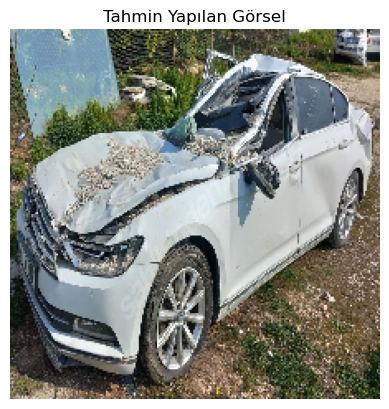

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step

✅ Tespit Edilen Hasar Türleri:
• Hasar Yok


In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Modeli yükle
model = load_model('../model/vgg16_car_damage_multilabel.h5')

# Etiketler (class indices sırası)
labels = [
    'bumper_dent',
    'bumper_scratch',
    'door_dent',
    'door_scratch',
    'glass_shatter',
    'head_lamp',
    'tail_lamp',
    'unknown'  # hasar yok anlamında
]

# Türkçe karşılıkları
label_translations = {
    'bumper_dent': 'Tampon Çökmesi',
    'bumper_scratch': 'Tampon Çizik',
    'door_dent': 'Kapı Çökmesi',
    'door_scratch': 'Kapı Çizik',
    'glass_shatter': 'Cam Kırılması',
    'head_lamp': 'Ön Far Kırılması',
    'tail_lamp': 'Arka Far Kırılması',
    'unknown': 'Hasar Yok'
}

print("\n--- Araç Hasar Tespit Sistemi Başlatıldı (MultiLabel Predict) ---\n")
file_path = input("✅ Dosya yolu girin (örn: C:/Users/Leopard/Desktop/araba1.jpeg): ")

# Fotoğrafı yükle
try:
    img = image.load_img(file_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Tahmin Yapılan Görsel")
    plt.show()

    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Tahmin yap
    preds = model.predict(img_array)[0]

    # Eşik değer: 0.5 üstü => Etiket seç
    threshold = 0.5
    selected_labels = [labels[i] for i, p in enumerate(preds) if p >= threshold]

    # Eğer hiçbir hasar bulunmazsa
    if not selected_labels:
        print("\n✅ Araçta herhangi bir hasar tespit edilmedi. (Model: Hasar Yok)")
    else:
        print("\n✅ Tespit Edilen Hasar Türleri:")
        for label in selected_labels:
            translated_label = label_translations.get(label, label)
            print(f"• {translated_label}")

except Exception as e:
    print(f"Hata oluştu: {str(e)}")
